[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JMAdKhFV0gHSBAN1yRzTkOZ9C90I8Wj4?usp=sharing)

##Group14
##LAB 7 Gale-Shapley and Irving Algorithms (Groups)  [part of the first test]

1) Find the best and worst cases for the Gale-Shapley and Irving (An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

#Gale - Shapley Algorithm

In [89]:
#source https://www.geeksforgeeks.org/stable-marriage-problem/
# This function returns true if
# woman 'w' prefers man 'm1' over man 'm'
def wPrefersM1OverM(prefer, w, m, m1, N):

    # Check if w prefers m over her
    # current engagement m1
    for i in range(N):

        # If m1 comes before m in list of w,
        # then w prefers her current engagement,
        # don't do anything
        if (prefer[w][i] == m1):
            return True

        # If m comes before m1 in w's list,
        # then free her current engagement
        # and engage her with m
        if (prefer[w][i] == m):
            return False

# Prints stable matching for N boys and N girls.
# Boys are numbered as 0 to N-1.
# Girls are numbered as N to 2N-1.
def gale_shapley_sma(prefer, N):

    # Stores partner of women. This is our output
    # array that stores passing information.
    # The value of wPartner[i] indicates the partner
    # assigned to woman N+i. Note that the woman numbers
    # between N and 2*N-1. The value -1 indicates
    # that (N+i)'th woman is free
    wPartner = [-1 for i in range(N)]

    # An array to store availability of men.
    # If mFree[i] is false, then man 'i' is free,
    # otherwise engaged.
    mFree = [False for i in range(N)]

    freeCount = N

    # While there are free men
    while (freeCount > 0):

        # Pick the first free man (we could pick any)
        m = 0
        while (m < N):
            if (mFree[m] == False):
                break
            m += 1

        # One by one go to all women according to
        # m's preferences. Here m is the picked free man
        i = 0
        while i < N and mFree[m] == False:
            w = prefer[m][i]

            # The woman of preference is free,
            # w and m become partners (Note that
            # the partnership maybe changed later).
            # So we can say they are engaged not married
            if (wPartner[w - N] == -1):
                wPartner[w - N] = m
                mFree[m] = True
                freeCount -= 1

            else:

                # If w is not free
                # Find current engagement of w
                m1 = wPartner[w - N]

                # If w prefers m over her current engagement m1,
                # then break the engagement between w and m1 and
                # engage m with w.
                if (wPrefersM1OverM(prefer, w, m, m1, N) == False):
                    wPartner[w - N] = m
                    mFree[m] = True
                    mFree[m1] = False
            i += 1

            # End of Else
        # End of the for loop that goes
        # to all women in m's list
    # End of main while loop

    # Print solution
    print("Woman ", " Man")
    for i in range(N):
        print(i + N, "\t", wPartner[i])

In [94]:
import numpy as np
#N = 4
n = 4
mpref = [ list(map(lambda l: l + n, np.random.permutation(n))) for i in range(n) ]
wpref = [ list(np.random.permutation(n)) for i in range(n) ]
pref_l = mpref + wpref
print("n = 4")
gale_shapley_sma(pref_l, n)
print()

#N = 40
n = 40
mpref = [ list(map(lambda l: l + n, np.random.permutation(n))) for i in range(n) ]
wpref = [ list(np.random.permutation(n)) for i in range(n) ]
pref_l = mpref + wpref
print("n = 40")
gale_shapley_sma(pref_l, n)

n = 4
Woman   Man
4 	 1
5 	 2
6 	 3
7 	 0

n = 40
Woman   Man
40 	 18
41 	 13
42 	 31
43 	 35
44 	 37
45 	 0
46 	 27
47 	 3
48 	 26
49 	 14
50 	 9
51 	 39
52 	 12
53 	 20
54 	 10
55 	 2
56 	 34
57 	 32
58 	 25
59 	 17
60 	 8
61 	 7
62 	 5
63 	 19
64 	 22
65 	 28
66 	 16
67 	 21
68 	 1
69 	 29
70 	 23
71 	 15
72 	 30
73 	 11
74 	 33
75 	 24
76 	 36
77 	 4
78 	 38
79 	 6


#Irving Algorithm

In [95]:
def irving_rhma(rpref, hpref):
  #track of r with h. dict for indexing
  n = len(rpref)
  ravl = [ -1 for i in range(n) ]
  havl = dict()
  while ravl.count(-1) != 0:
    for r in range(n):
      if ravl[r] == -1:
        h = rpref[r][0]
        rpref[r].pop(0) #dscrd
        if h not in havl:
          havl[h] = r
          ravl[r] = h
        else:
          dsp_r = havl[h]
          chpref = hpref[h]
          if chpref.index(r) < chpref.index(dsp_r):
            havl[h] = r
            ravl[r] = h
            ravl[dsp_r] = -1
  return ravl

In [96]:
import numpy as np
#N = 4
n = 4
rpref = [ list(np.random.permutation(n)) for i in range(n) ]
hpref = [ list(np.random.permutation(n)) for i in range(n) ]
print(f"r. match. n = 4: {irving_rhma(rpref, hpref)}")

#N = 40
n = 40
rpref = [ list(np.random.permutation(n)) for i in range(n) ]
hpref = [ list(np.random.permutation(n)) for i in range(n) ]
print(f"r. match n = 40: {irving_rhma(rpref, hpref)}")

r. match. n = 4: [1, 3, 0, 2]
r. match n = 40: [26, 0, 6, 10, 36, 35, 16, 23, 30, 22, 24, 34, 38, 14, 25, 39, 15, 37, 17, 28, 12, 21, 32, 27, 7, 20, 13, 1, 33, 2, 5, 11, 8, 18, 31, 29, 19, 4, 3, 9]


2) Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [97]:
#source https://www.geeksforgeeks.org/stable-marriage-problem/
# This function returns true if
# woman 'w' prefers man 'm1' over man 'm'
def wPrefersM1OverM(prefer, w, m, m1, N):

    # Check if w prefers m over her
    # current engagement m1
    for i in range(N):

        # If m1 comes before m in list of w,
        # then w prefers her current engagement,
        # don't do anything
        if (prefer[w][i] == m1):
            return True

        # If m comes before m1 in w's list,
        # then free her current engagement
        # and engage her with m
        if (prefer[w][i] == m):
            return False

# Prints stable matching for N boys and N girls.
# Boys are numbered as 0 to N-1.
# Girls are numbered as N to 2N-1.
def gale_shapley_sma_itr(prefer, N, iter):

    # Stores partner of women. This is our output
    # array that stores passing information.
    # The value of wPartner[i] indicates the partner
    # assigned to woman N+i. Note that the woman numbers
    # between N and 2*N-1. The value -1 indicates
    # that (N+i)'th woman is free
    wPartner = [-1 for i in range(N)]

    # An array to store availability of men.
    # If mFree[i] is false, then man 'i' is free,
    # otherwise engaged.
    mFree = [False for i in range(N)]

    freeCount = N
    iter_i = 0
    # While there are free men
    while (freeCount > 0):

        # Pick the first free man (we could pick any)
        m = 0
        while (m < N):
            if (mFree[m] == False):
                break
            m += 1

        # One by one go to all women according to
        # m's preferences. Here m is the picked free man
        i = 0
        while i < N and mFree[m] == False:
            w = prefer[m][i]

            # The woman of preference is free,
            # w and m become partners (Note that
            # the partnership maybe changed later).
            # So we can say they are engaged not married
            if (wPartner[w - N] == -1):
                wPartner[w - N] = m
                mFree[m] = True
                freeCount -= 1

            else:

                # If w is not free
                # Find current engagement of w
                m1 = wPartner[w - N]

                # If w prefers m over her current engagement m1,
                # then break the engagement between w and m1 and
                # engage m with w.
                if (wPrefersM1OverM(prefer, w, m, m1, N) == False):
                    wPartner[w - N] = m
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
            # End of Else
        # End of the for loop that goes
        # to all women in m's list
        iter_i += i
        iter_i += 1
    # End of main while loop
    iter.append(iter_i)
    return iter

For n = 4:
Min iterations: 8
Max iterations: 23
Average iterations: 13.44


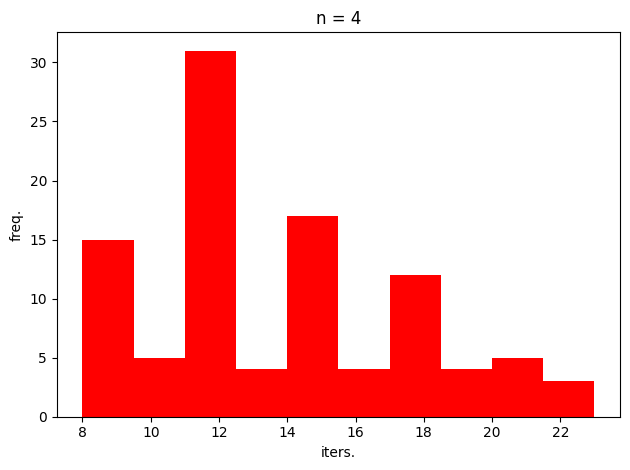

For n = 40:
Min iterations: 177
Max iterations: 598
Average iterations: 327.8


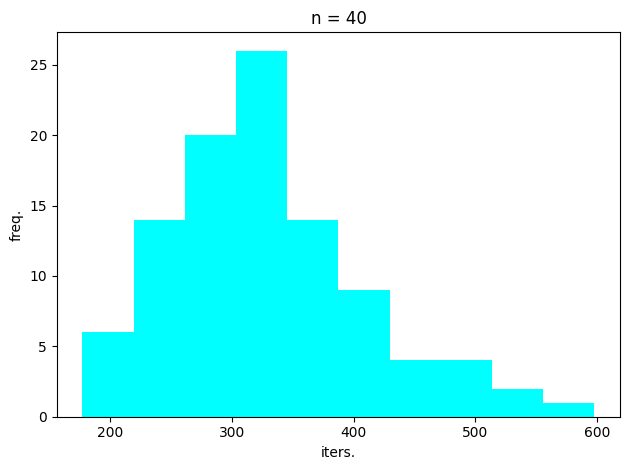

In [101]:
import numpy as np
import matplotlib.pyplot as plt

iter4 = []
#N = 4
n = 4
for i in range(100):
  pref_l = []
  mpref = [ list(map(lambda l: l + n, np.random.permutation(n))) for i in range(n) ]
  wpref = [ list(np.random.permutation(n)) for i in range(n) ]
  pref_l = mpref + wpref
  iter4 = gale_shapley_sma_itr(pref_l, n, iter4)
print(f"For n = 4:\nMin iterations: {min(iter4)}\nMax iterations: {max(iter4)}\nAverage iterations: {sum(iter4) / 100}")
plt.hist(iter4, color="red", rwidth=4)
plt.title("n = 4")
plt.xlabel("iters.")
plt.ylabel("freq.")
plt.tight_layout()
plt.show()

#N = 40
iter40 = []
n = 40
for i in range(100):
  pref_l = []
  mpref = [ list(map(lambda l: l + n, np.random.permutation(n))) for i in range(n) ]
  wpref = [ list(np.random.permutation(n)) for i in range(n) ]
  pref_l = mpref + wpref
  iter40 = gale_shapley_sma_itr(pref_l, n, iter40)
print(f"For n = 40:\nMin iterations: {min(iter40)}\nMax iterations: {max(iter40)}\nAverage iterations: {sum(iter40) / 100}")
plt.hist(iter40, color="cyan", rwidth=4)
plt.title("n = 40")
plt.xlabel("iters.")
plt.ylabel("freq.")
plt.tight_layout()
plt.show()

3) Simulate the the Gale-Shapley and Irving algorithms using random preference lists , for n=4 and 40 and generate a gift animation fo the type show in “Illustrating the Deferred Acceptance Algorithm with R